### **Algoritmo de Machine Learn**  

- Com esse algoritimo vou usar modelos de ML para tentar **prever** o valor de um apartamento em São Paulo  
- Para isso usei a seguinte base de dados do Kaggle:  
    - https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

- Nesse projeto irei usar 3 modelos de ML  
    - Linear Regression  
    - Decision Tree Regressor  
    - Random Forest Regressor  

- No final irei dizer qual modelo foi melhor e porque ele foi melhor que os outros

In [2]:
# Bibliotecas
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
pio.renderers.default = "browser" # Para abrir os gráficos em um navegador

In [3]:
# Importando a base e visualizando as primeiras linhas
base = pd.read_csv(r'sao-paulo-properties-april-2019.csv')
base.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [4]:
# Filtrando a base para aluguel
base_rent = base[base['Negotiation Type'] == 'rent']

In [5]:
# Gráfico para visualização do endereço das casas (lembre que isso irá abrir no navegador)
fig = px.scatter_mapbox(base_rent, lat='Latitude', lon='Longitude', color='Price', size='Size', 
                        color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, opacity=0.4
                        )

fig.update_coloraxes(colorscale = [[0, 'rgb(166,206,227, 0.5)'],
                                   [0.02, 'rgb(31,120,180, 0.5)'],
                                   [0.05, 'rgb(178,223,138, 0.5)'],
                                   [0.10, 'rgb(51,160,44, 0.5)'],
                                   [0.20, 'rgb(251,154,153, 0.5)'],
                                   [1, 'rgb(227,26,28, 0.5)']
                                ],
                            )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.60486)))
fig.update_layout(mapbox_style="open-street-map")

fig.show()

In [6]:
# Vendo as informações da base
base_rent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memory usa

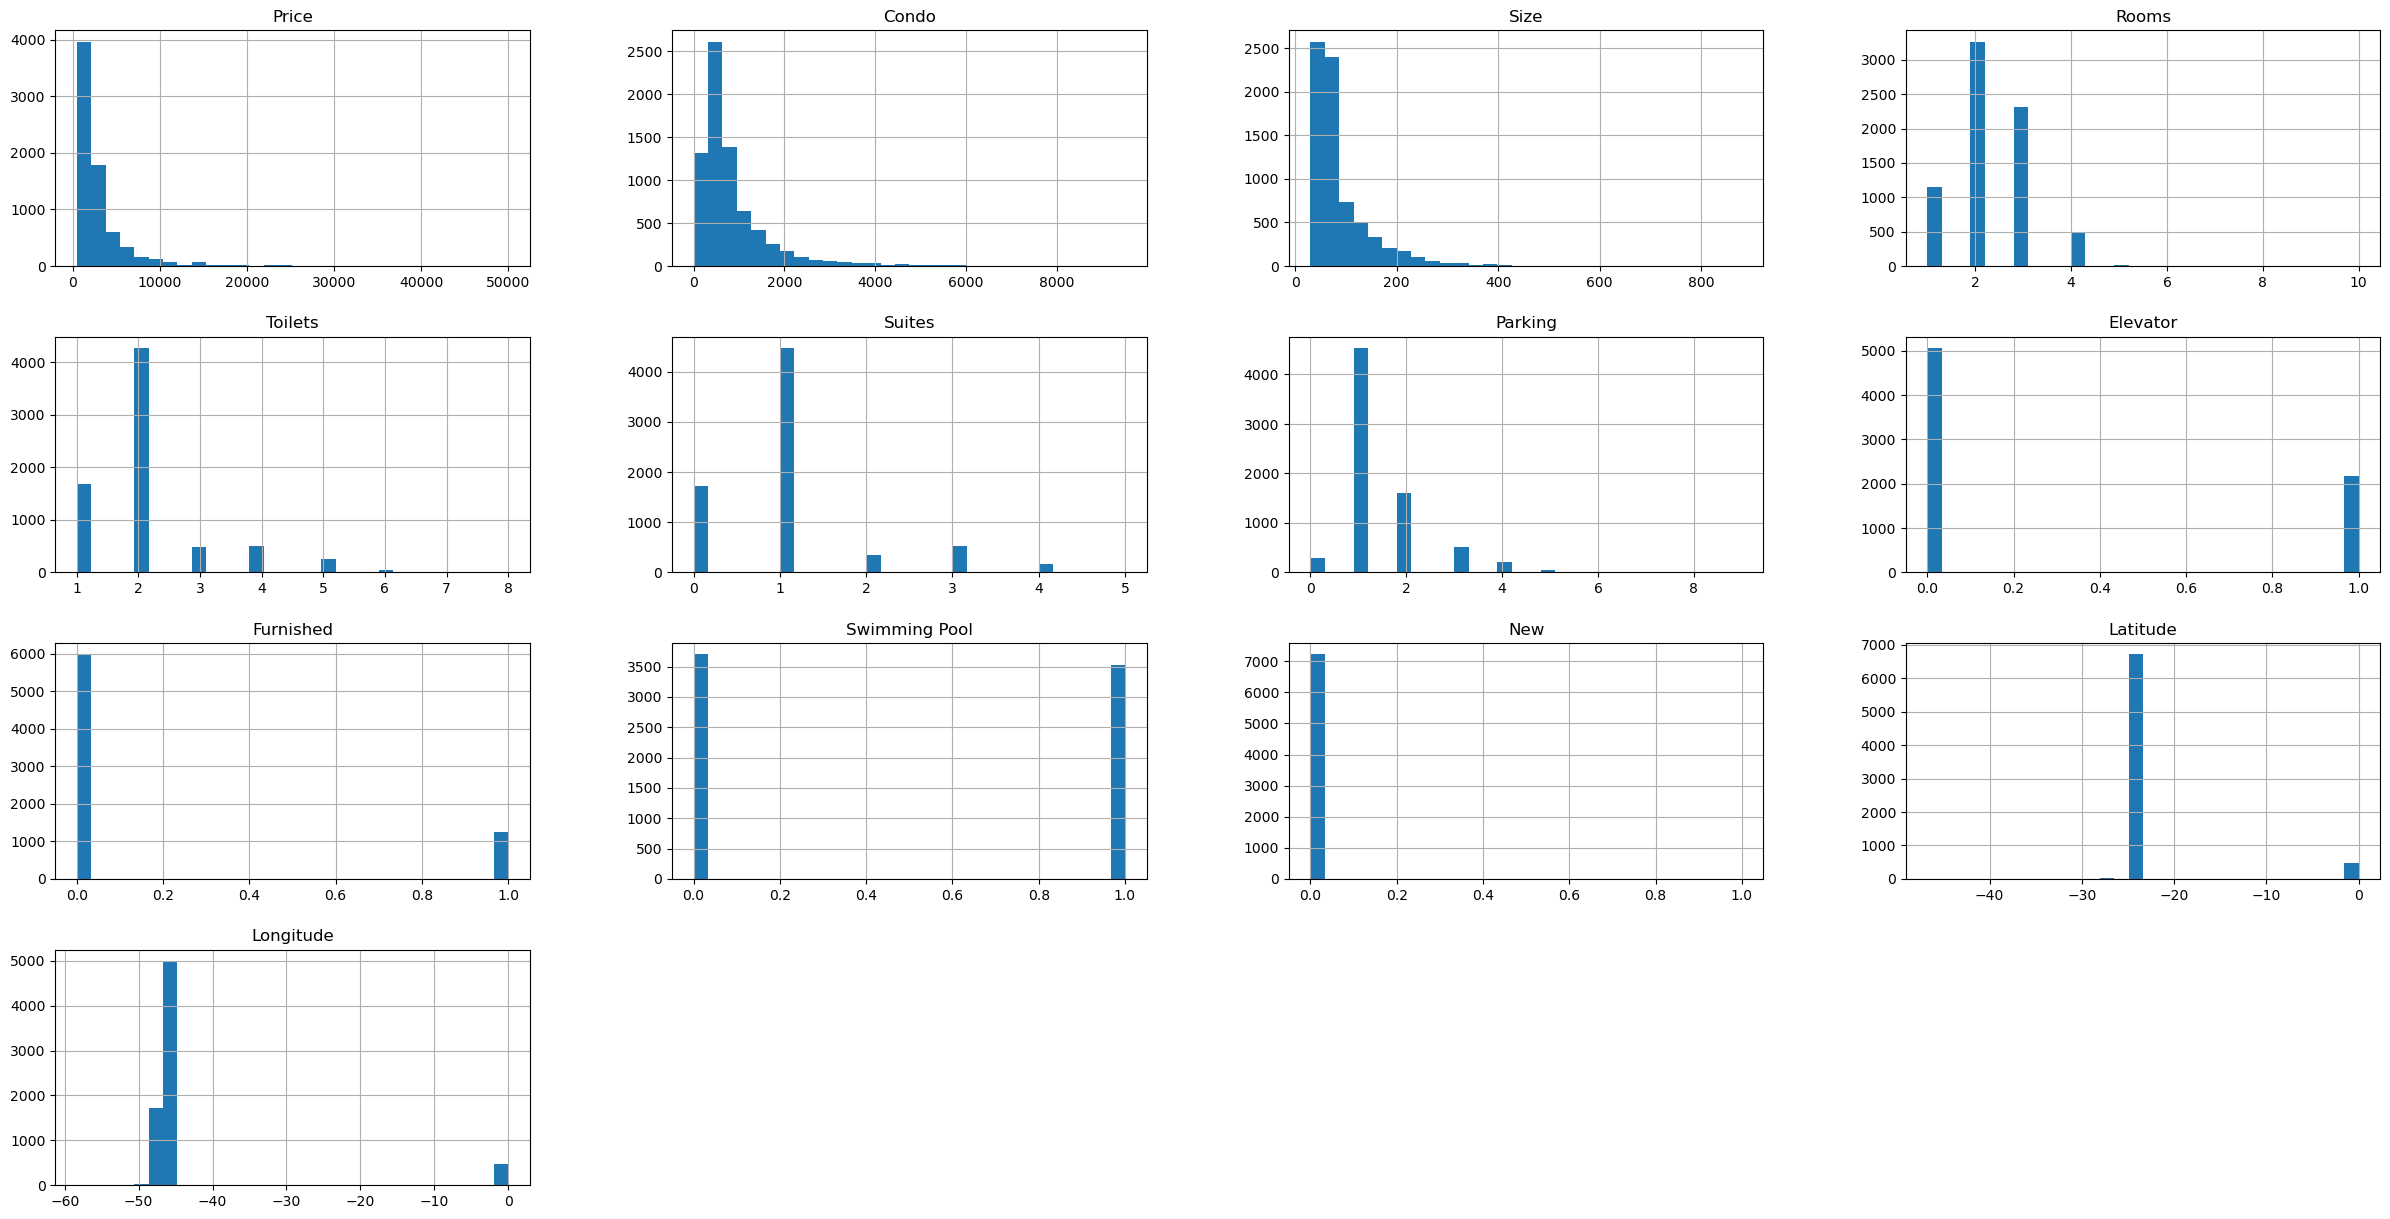

In [7]:
# Verificando a distribuição dos dados
base_rent.hist(bins=30, figsize=(30,15));

In [8]:
# Verificando a correlação entre as variáveis
base_rent.select_dtypes(include=['number']).corr()['Price'].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

In [9]:
# Removendo que não são necessárias
new_base = base_rent.drop(['New', 'Negotiation Type', 'Property Type'], axis=1)

In [10]:
# Trasformando os bairros em números, removendo "District" e adicionando as colunas de bairros
one_hot = pd.get_dummies(new_base['District'])
base = new_base.drop('District', axis=1)
base = base.join(one_hot)

In [11]:
# Separando as variaveis que vou colocar no modelo
from sklearn.model_selection import train_test_split
y = base['Price']
X = base.loc[:, base.columns != 'Price']

In [12]:
# Separando os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# Importando o cross validation e criando uma função para exibir os scores
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())


# **Primeiro modelo: Linear Regression**

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [15]:
# Verificando o erro do modelo
from sklearn.metrics import mean_squared_error
preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1915.4454431018248

In [16]:
# Verificando o erro com cross validation
scores = cross_val_score(lin_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [1497.93047505 2166.95905027 1557.45164243 1731.33418118 2496.05916667
 2099.47185084 1871.77399805 2074.82162445 1961.42794833 2018.05352936]
Mean: 1947.5283466645565
Standard deviation: 282.89044193951196


## **Segundo modelo: Decision Tree Regressor**

In [17]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [18]:
# Verificando o erro do modelo
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

38.72938092661971

In [19]:
# Verificando o erro com cross validation
scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [2135.49685951 3302.02812647 2718.26554282 2116.50935045 3084.68457145
 2504.62854563 2178.86961936 2656.58469654 2684.78936958 2436.52282713]
Mean: 2581.837950893336
Standard deviation: 375.7046048651095


## **Terceiro modelo: Random Forest Regressor**

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [21]:
# Verificando o erro do modelo
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

653.8523499312881

In [22]:
# Verificando o erro com cross validation
scores = cross_val_score(rf_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
rf_rmse_scores = np.sqrt(-scores)
display_scores(rf_rmse_scores)

Scores: [1363.78942047 2298.71436148 1188.82098193 1379.99075605 2405.47201415
 1724.79962384 1718.14598564 1636.71911628 1973.45124876 1550.14634862]
Mean: 1724.004985721605
Standard deviation: 378.0628499556723


## **Otimizando o modelo**

In [23]:
# Usando o GridSearch para encontrar os melhores parâmetros
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [24]:
# Melhores parâmetros
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [25]:
# Melhor modelo
final_model = grid_search.best_estimator_
final_model_preds = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_preds)
print(np.sqrt(final_mse))

1887.8764905445203


In [26]:
# Gráfico para visualização do erro (lembre que isso irá abrir no navegador)
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                      go.Scatter(y=final_model_preds)])
fig.show()

In [27]:
import joblib
joblib.dump(final_model, 'model.pkl')

['model.pkl']

## **Qual modelo foi melhor?**
  
**Random Forest Regressor**

Mesmo com os dados de treino dele sendo inferiores ao de **Decision Tree Forest**, o **Decision Tree Forest** sofreu de overfiting e o **Linear Regression** sofreu de underfiting, mas quando comparamos as médias do **Random Forest Regressor** com as médias dos outros modelos, dá pra perceber que a média de erro do **Random Forest Regressor** é menor que as médias dos modelos de **Linear Regression** e **Decision Tree Forest**.  

Sendo assim, **Random Forest Regressor é o melhor modelo para se usar nesse caso**.